<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import moudle

In [91]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

load data

In [92]:
path = './data/train'
img_list= []
label_list = []
for label in os.listdir(path):
  for file_name in os.listdir(os.path.join(path, label)):
    img = Image.open(os.path.join(path, label, file_name))
    img = img.resize(size=(64,64))
    img_list.append(np.array(img))
    label_list.append(label)

all classes

In [93]:
class_name = ['speed_limit_20', 'speed_limit_30', 'speed_limit_50']

check shape

In [94]:
X_train = np.array(img_list, dtype=int)
Y_train = np.array(label_list, ndmin=1, dtype=int)
X_train.shape, Y_train.shape

((4688, 64, 64, 3), (4688,))

feature scale

In [95]:
X_train = X_train/255

show image

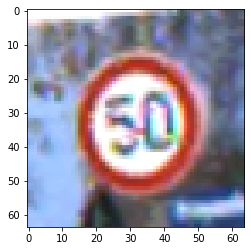

In [98]:
plt.imshow(X_train[4687])

create a simple model

In [100]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[64, 64, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(3, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.1)

Epoch 1/30
132/132 [==============================] - 43s 286ms/step - loss: 0.6029 - accuracy: 0.7888 - val_loss: 0.8269 - val_accuracy: 0.5949
Epoch 2/30
132/132 [==============================] - 10s 72ms/step - loss: 0.2309 - accuracy: 0.9166 - val_loss: 0.3628 - val_accuracy: 0.8358
Epoch 3/30
132/132 [==============================] - 11s 82ms/step - loss: 0.2082 - accuracy: 0.9239 - val_loss: 0.0822 - val_accuracy: 0.9808
Epoch 4/30
132/132 [==============================] - 13s 102ms/step - loss: 0.1414 - accuracy: 0.9483 - val_loss: 0.2762 - val_accuracy: 0.8785
Epoch 5/30
132/132 [==============================] - 11s 87ms/step - loss: 0.1246 - accuracy: 0.9528 - val_loss: 0.1135 - val_accuracy: 0.9595
Epoch 6/30
132/132 [==============================] - 9s 68ms/step - loss: 0.1177 - accuracy: 0.9588 - val_loss: 0.1205 - val_accuracy: 0.9552
Epoch 7/30
132/132 [==============================] - 10s 79ms/step - loss: 0.1120 - accuracy: 0.9576 - val_loss: 0.0126 - val_accuracy

train error and val error

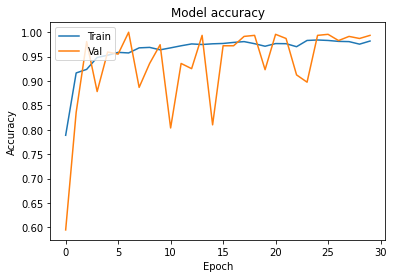

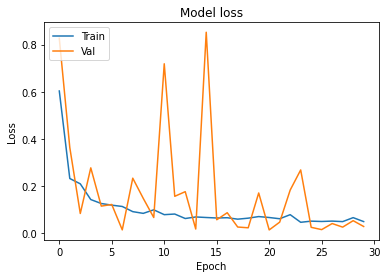

In [101]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()